In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import itertools
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from re import X
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score

In [377]:
dados = pd.read_csv('/content/hoteis.csv')

In [378]:
dados

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


In [379]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


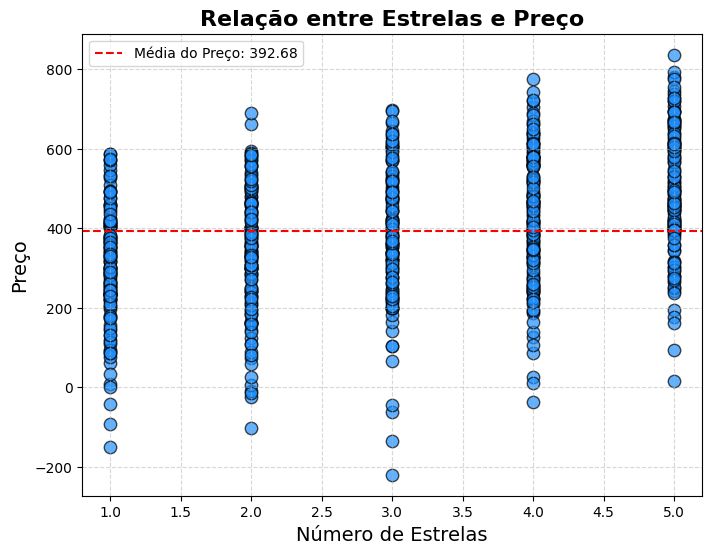

In [380]:
x = df_train['Estrelas']
y = df_train['Preco']

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='dodgerblue', alpha=0.7, edgecolor='k', s=80)

plt.title('Relação entre Estrelas e Preço', fontsize=16, weight='bold')
plt.xlabel('Número de Estrelas', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.axhline(y=y.mean(), color='red', linestyle='--', label=f'Média do Preço: {y.mean():.2f}')
plt.legend()

plt.show()


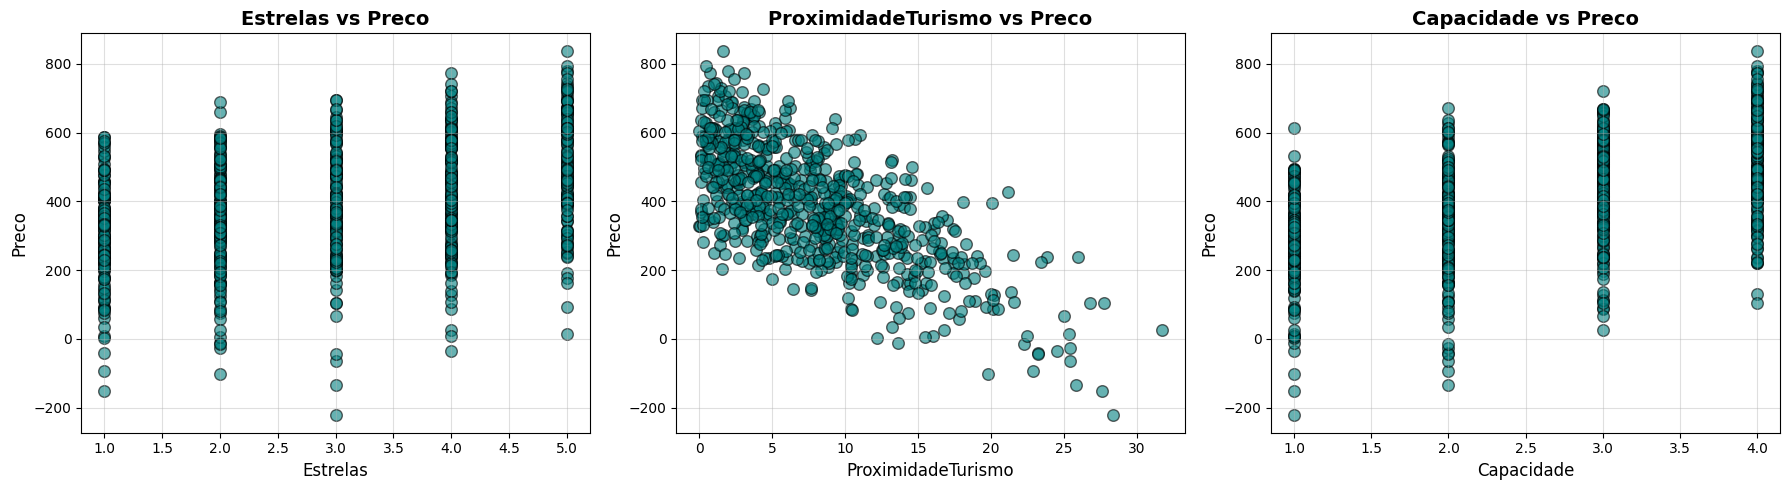

In [381]:
variaveis = ['Estrelas', 'ProximidadeTurismo', 'Capacidade']
y = 'Preco'

plt.figure(figsize=(18,5))

for i, var in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    plt.scatter(df_train[var], df_train[y], color='teal', alpha=0.6, edgecolor='k', s=70)
    plt.title(f'{var} vs {y}', fontsize=14, weight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

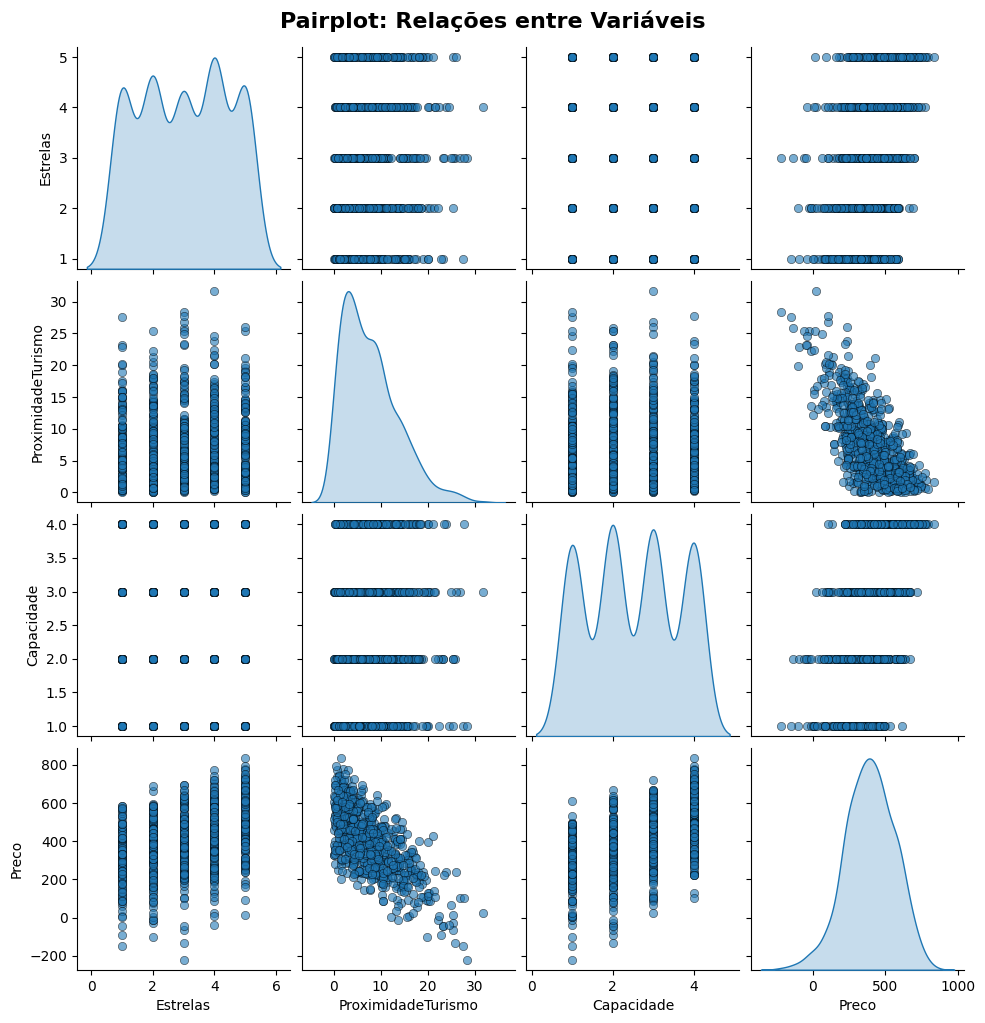

In [382]:
sns.pairplot(df_train[['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco']],
             diag_kind='kde', plot_kws={'alpha':0.6, 'edgecolor':'k'})
plt.suptitle('Pairplot: Relações entre Variáveis', fontsize=16, weight='bold', y=1.02)
plt.show()


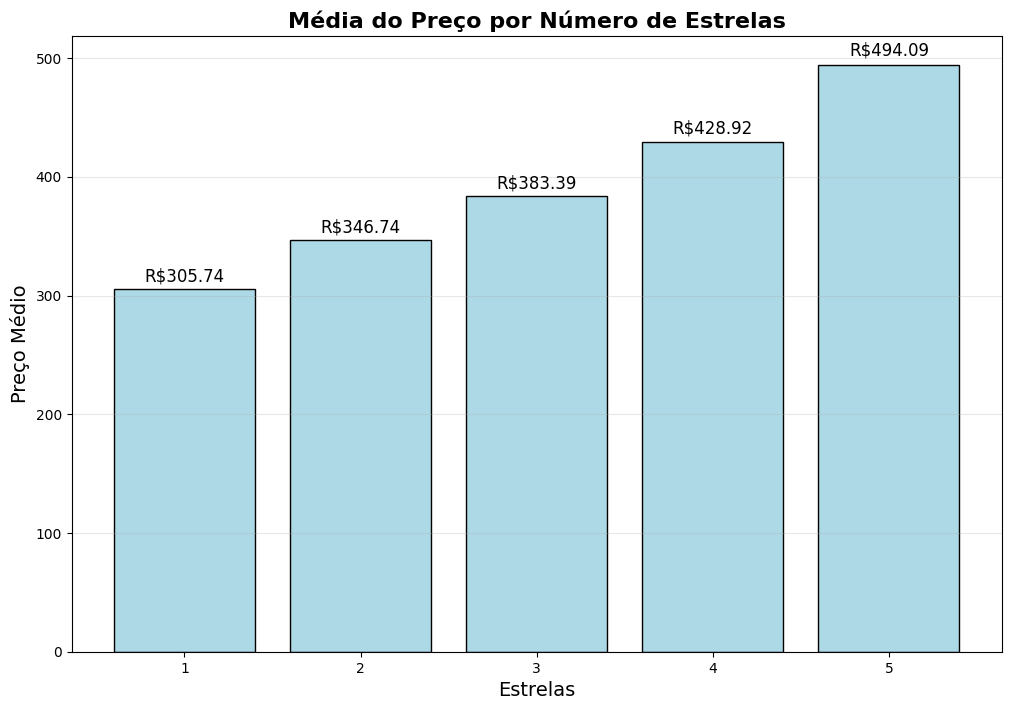

In [383]:
media_preco = df_train.groupby('Estrelas')['Preco'].mean().reset_index()

plt.figure(figsize=(12,8))
bars = plt.bar(media_preco['Estrelas'].astype(str), media_preco['Preco'], color='Lightblue', edgecolor='k')
plt.title('Média do Preço por Número de Estrelas', fontsize=16, weight='bold')
plt.xlabel('Estrelas', fontsize=14 )
plt.ylabel('Preço Médio', fontsize=14)
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura * 1.01,
            f'R${altura:.2f}',
            ha='center', va='bottom', fontsize=12, color='black')
plt.show()

In [384]:
dados.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

In [385]:
X_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [386]:
X = dados[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
Y = dados['Preco']

In [387]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [388]:
df_train = pd.DataFrame(data=X_train)
df_train['Preco'] = y_train

In [389]:
modelo_0 = ols('Preco ~ 1', data=df_train).fit()

In [390]:
modelo_0.params

,0
Intercept,392.683136


In [391]:
modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preco   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 16 Jul 2025   Prob (F-statistic):                nan
Time:                        21:20:41   Log-Likelihood:                -4587.7
No. Observations:                 700   AIC:                             9177.
Df Residuals:                     699   BIC:                             9182.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    392.6831      6.425     61.121      0.000     380.069     405.297
==============================================================================
Omnibus:                        7.785   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.726
Skew:                          -0.254   Prob(JB):                       0.0210
Kurtosis:                       3.085   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
modelo_0.rsquared

np.float64(-2.220446049250313e-16)

In [393]:
modelo_0.resid

,0
290,-19.795805
167,200.511079
486,83.909683
683,-38.978661
876,-35.026848
...,...
575,97.356798
838,136.591323
337,49.080252
523,30.101563


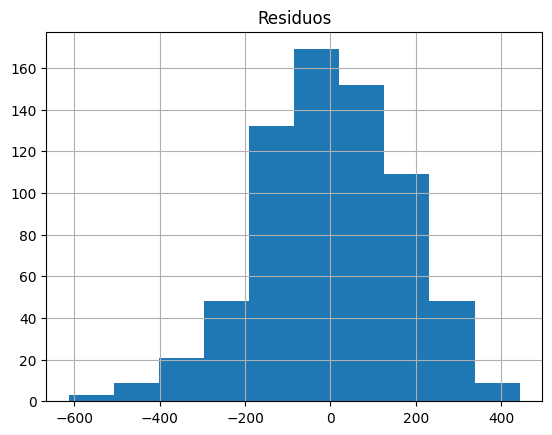

In [394]:
modelo_0.resid.hist()
plt.title('Residuos')
plt.show()

In [395]:
y_predict = modelo_0.predict(x_test)

In [396]:
print('R²:', r2_score(y_test, y_predict))

R²: -0.0055707897894234915


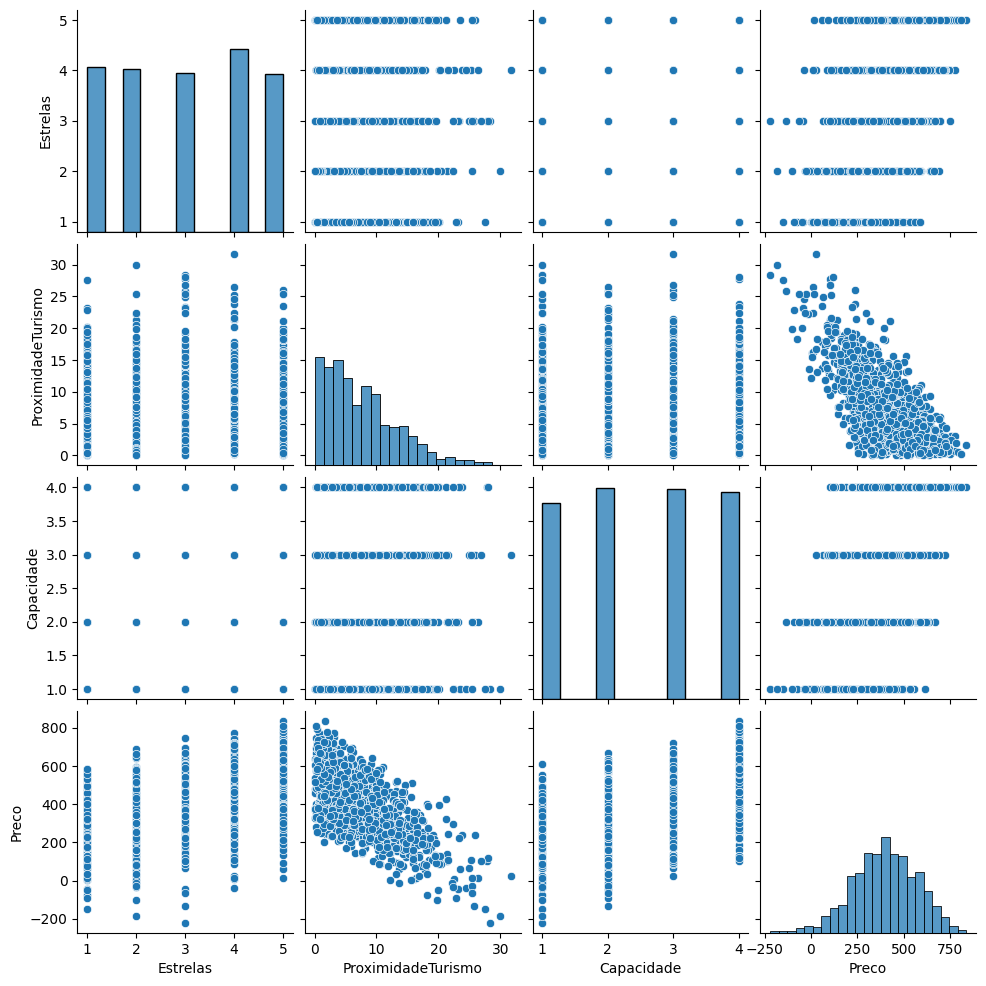

In [397]:
sns.pairplot(dados)

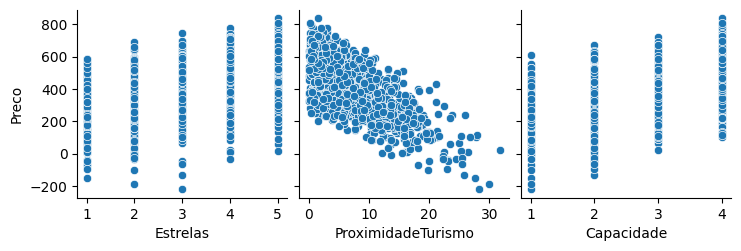

In [398]:
sns.pairplot(dados, y_vars='Preco', x_vars= ['Estrelas', 'ProximidadeTurismo', 'Capacidade'])

In [399]:
X_train = sm.add_constant(X_train)

In [400]:
X_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [401]:
modelo_1 = sm.OLS(y_train,
                  X_train[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

In [402]:
modelo_2 = sm.OLS(y_train,
                  X_train[['const', 'Estrelas', 'ProximidadeTurismo']]).fit()

In [403]:
modelo_3 = sm.OLS(y_train,
                  X_train[['const', 'Estrelas', 'Capacidade']]).fit()

In [404]:
print("📊 MODELO 1:")
print(modelo_1.summary())

print("\n📊 MODELO 2:")
print(modelo_2.summary())

print("\n📊 MODELO 3:")
print(modelo_3.summary())


📊 MODELO 1:
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2757.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:45   Log-Likelihood:                -3693.1
No. Observations:                 700   AIC:                             7394.
Df Residuals:                     696   BIC:                             7412.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                190

In [405]:
tabela_comparacao = pd.DataFrame({
    'Modelo': ['modelo_1', 'modelo_2', 'modelo_3'],
    'Adj R²': [modelo_1.rsquared_adj, modelo_2.rsquared_adj, modelo_3.rsquared_adj],
    'AIC': [modelo_1.aic, modelo_2.aic, modelo_3.aic],
    'BIC': [modelo_1.bic, modelo_2.bic, modelo_3.bic]
})

print(tabela_comparacao.sort_values(by='AIC'))


     Modelo    Adj R²          AIC          BIC
0  modelo_1  0.922052  7394.267256  7412.471577
1  modelo_2  0.646560  8451.443972  8465.097213
2  modelo_3  0.439536  8774.179848  8787.833089


/tmp/ipython-input-406-3172502377.py:26: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-406-3172502377.py:26: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



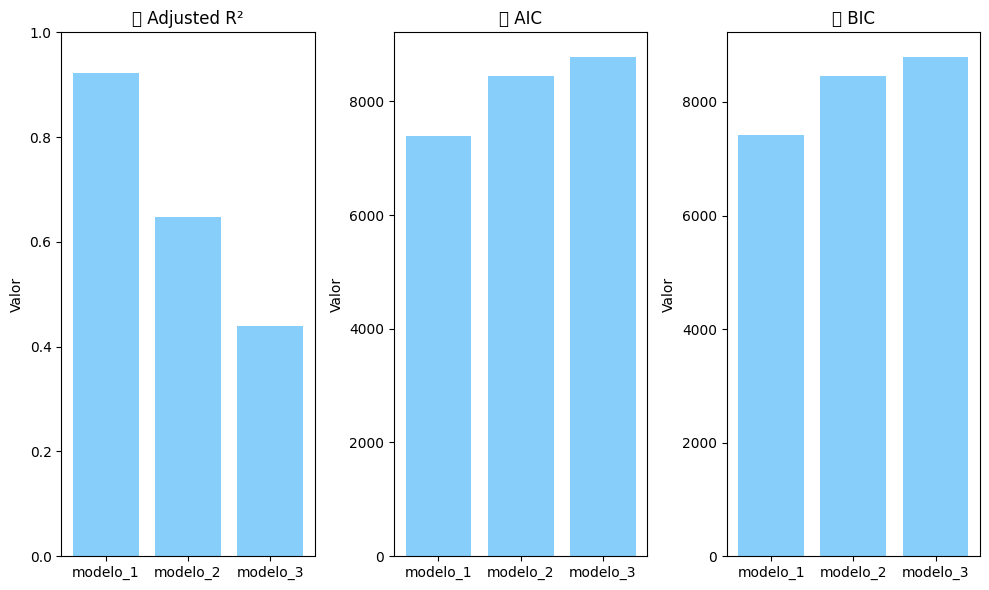

In [406]:
tabela_comparacao = pd.DataFrame({
    'Modelo': ['modelo_1', 'modelo_2', 'modelo_3'],
    'Adj_R2': [modelo_1.rsquared_adj, modelo_2.rsquared_adj, modelo_3.rsquared_adj],
    'AIC': [modelo_1.aic, modelo_2.aic, modelo_3.aic],
    'BIC': [modelo_1.bic, modelo_2.bic, modelo_3.bic]
})

plt.figure(figsize=(10,6))

plt.subplot(1, 3, 1)
plt.bar(tabela_comparacao['Modelo'], tabela_comparacao['Adj_R2'], color='LightSkyBlue')
plt.title('🔍 Adjusted R²')
plt.ylim(0, 1)
plt.ylabel('Valor')

plt.subplot(1, 3, 2)
plt.bar(tabela_comparacao['Modelo'], tabela_comparacao['AIC'], color='LightSkyBlue')
plt.title('📉 AIC')
plt.ylabel('Valor')

plt.subplot(1, 3, 3)
plt.bar(tabela_comparacao['Modelo'], tabela_comparacao['BIC'], color='LightSkyBlue')
plt.title('📉 BIC')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

In [407]:
variaveis = ['Estrelas', 'ProximidadeTurismo', 'Capacidade']

X_train_const = sm.add_constant(X_train)

y = y_train


In [408]:
resultados = []

for i in range(1, len(variaveis) + 1):
    for combinacao in itertools.combinations(variaveis, i):
        colunas = ['const'] + list(combinacao)
        modelo = sm.OLS(y, X_train_const[colunas]).fit()

        resultados.append({
            'Variáveis': combinacao,
            'Adj_R2': modelo.rsquared_adj,
            'AIC': modelo.aic,
            'BIC': modelo.bic,
            'Modelo': modelo
        })

df_resultados = pd.DataFrame(resultados)


In [409]:
melhor_aic = df_resultados.loc[df_resultados['AIC'].idxmin()]

melhor_bic = df_resultados.loc[df_resultados['BIC'].idxmin()]

melhor_r2 = df_resultados.loc[df_resultados['Adj_R2'].idxmax()]


In [410]:
print("🎯 MELHOR MODELO PELO AIC:")
print(f"Variáveis: {melhor_aic['Variáveis']}")
print(f"Adj_R²: {melhor_aic['Adj_R2']:.4f}")
print(f"AIC: {melhor_aic['AIC']:.2f}")
print(f"BIC: {melhor_aic['BIC']:.2f}")
print("\nResumo completo:")
print(melhor_aic['Modelo'].summary())

🎯 MELHOR MODELO PELO AIC:
Variáveis: ('Estrelas', 'ProximidadeTurismo', 'Capacidade')
Adj_R²: 0.9221
AIC: 7394.27
BIC: 7412.47

Resumo completo:
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2757.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:45   Log-Likelihood:                -3693.1
No. Observations:                 700   AIC:                             7394.
Df Residuals:                     696   BIC:                             7412.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|   

 O MELHOR MODELO PELO AIC FOI: MODELO 1 🥳

✅ Variáveis:
'Estrelas', 'ProximidadeTurismo' e 'Capacidade'.

✅ Ajustes:
Adjusted R²: 0.9221 → o modelo explica 92% da variação no preço.
Isso é excelente, principalmente com 3 variáveis apenas.


AIC: 7394.27

BIC: 7412.47


🧪 INTERPRETAÇÃO DAS VARIÁVEIS:


A cada estrela a mais, o preço sobe R$ 51,18.

Quanto mais perto de ponto turístico, o preço cai R$ 19,99 por unidade.

Cada pessoa a mais que o lugar comporta, o preço sobe R$ 81,10.


📌 DADOS TÉCNICOS RELEVANTES:

Todos os p-valores < 0.001 → cada variável é altamente significativa.

F-statistic: 2757 com Prob(F) = 0.00 → o modelo no conjunto é significante.

Durbin-Watson ≈ 2.0 → sem autocorrelação.

Omnibus & Jarque-Bera não significativos → os erros estão bem distribuídos.

Cond. No. 38.3 → sem multicolinearidade aparente.
